# 1. Introduction:

1. Looking at the dataset provided (cleanAndSnatch.csv) that contains records from 14 different (hypothetical) weightlifters, and their performance in the "snatch". (The "snatch" is the first of two lifts in the sport of weightlifting followed by the "clean".)
2. The objective is to estimate their performance in the "clean" using their age, body weight and their performance in the "snatch". 
3. Assess which of the three variable is the most and least predictive with respect to the clean.

In [1]:
# Import the libraries first

import numpy as np
import pandas as pd

# We will use matplotlib to plot figures
import matplotlib.pyplot as plt

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [2]:
# Load the data and take a look on the first 5 lines
d = pd.read_csv('cleanAndSnatch.csv')
d.head()

,Age,Body,Snatch,Clean,Total
0,26,163.0,210.0,262.5,472.5
1,30,140.7,205.0,250.0,455.0
2,22,161.3,207.5,240.0,447.5
3,27,118.4,200.0,240.0,440.0
4,23,125.1,195.0,242.5,437.5


# 2. OLS

In [3]:
# Initialize the regression model
m = sm.ols('Clean ~ Snatch + Body + Age', data = d)

# Fit the model
m = m.fit()

In [4]:
# Predict clean performance
d['Clean_predicted'] = m.predict(d)

# Calculate the residuals
d['Clean_residuals'] = d.Clean_predicted - d.Clean

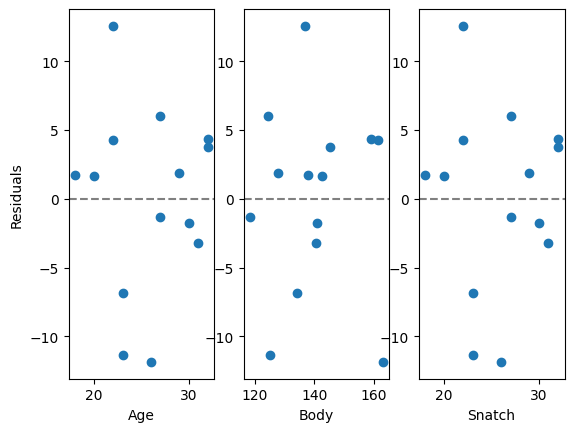

In [5]:
# Plot the dependence between the residuals and individual variables
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.plot(d.Age, d.Clean_residuals, 'o')
ax1.axhline(y = 0, linestyle = '--', color = 'grey')
ax1.set_xlabel('Age')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(132)
ax2.plot(d.Body, d.Clean_residuals, 'o')
ax2.axhline(y = 0, linestyle = '--', color = 'grey')
ax2.set_xlabel('Body')

ax1 = fig.add_subplot(133)
ax1.plot(d.Age, d.Clean_residuals, 'o')
ax1.axhline(y = 0, linestyle = '--', color = 'grey')
ax1.set_xlabel('Snatch')

plt.show()

# 3. Regression plots

## 3.1 Age

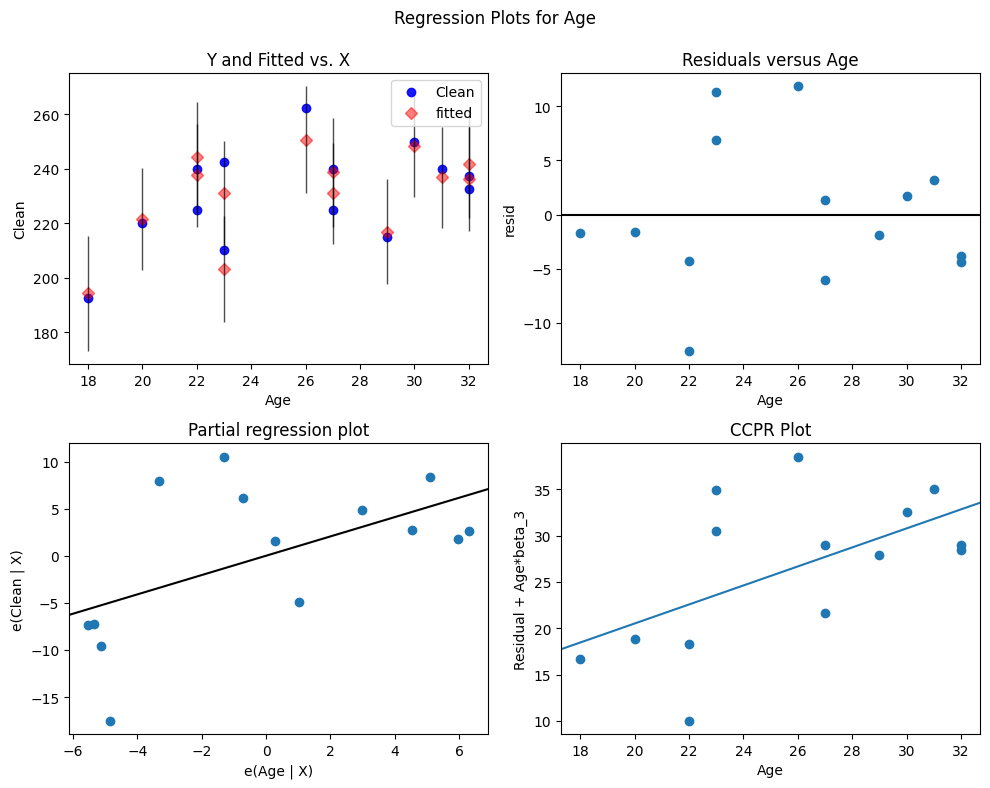

In [6]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Age", fig = fig)

## 3.2 Body

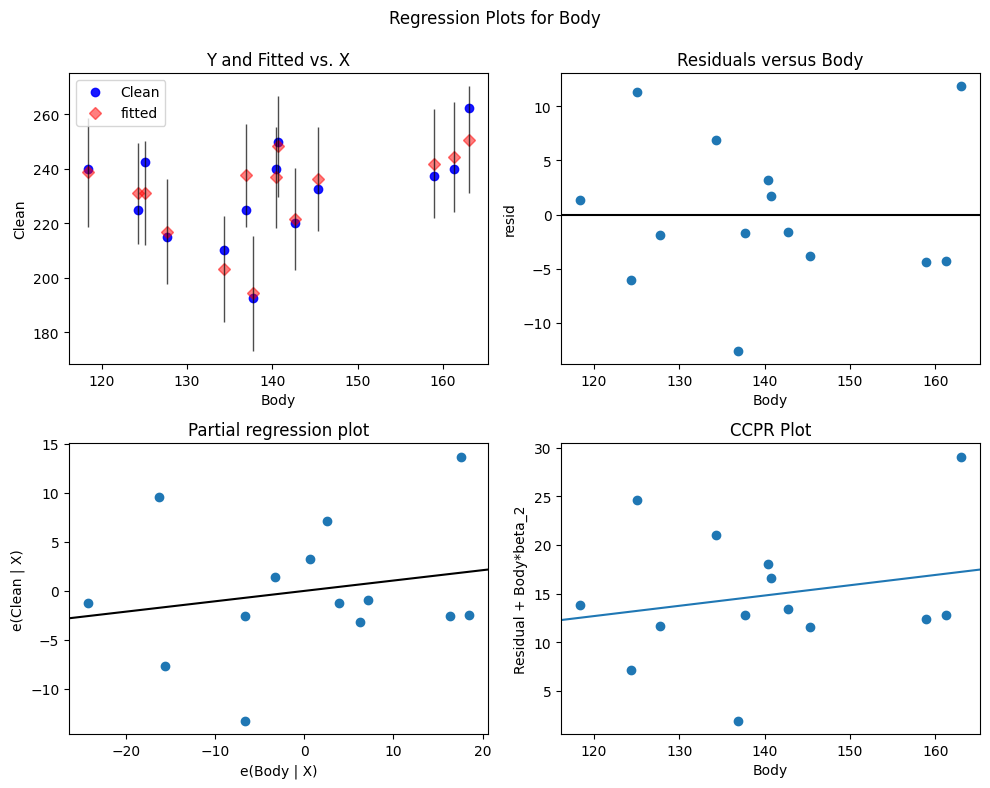

In [7]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Body", fig = fig)

## 3.3 Snatch

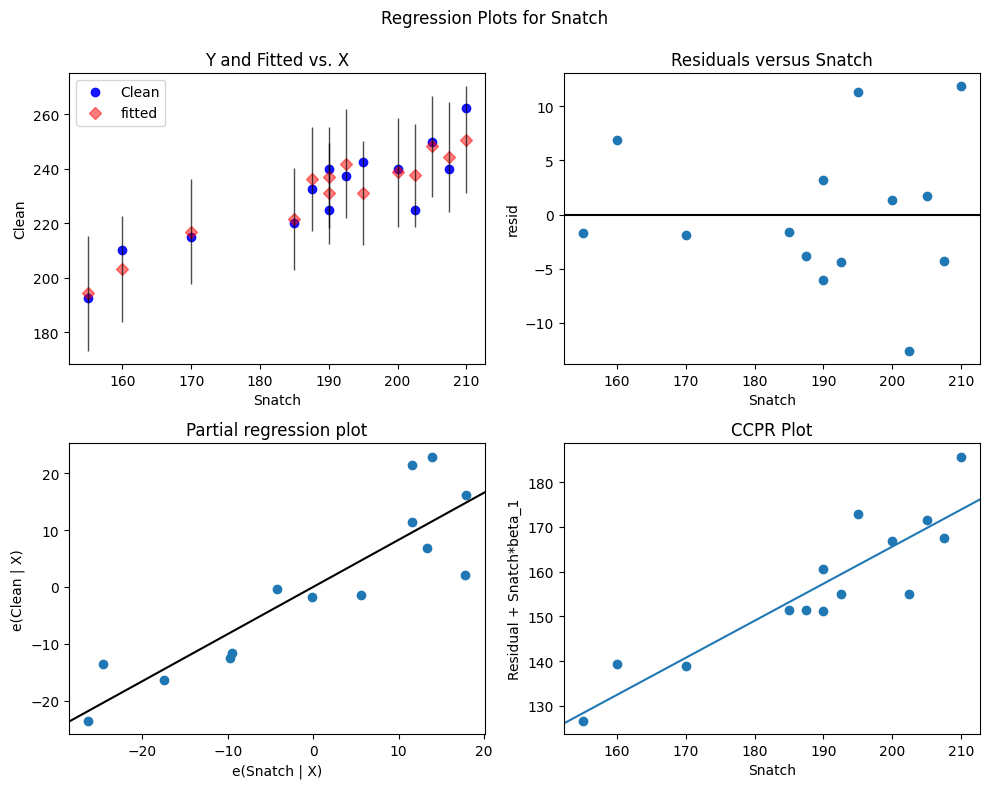

In [10]:
fig = plt.figure(figsize=(10,8))
fig = plot_regress_exog(m, "Snatch", fig = fig)

# 4. Leverage

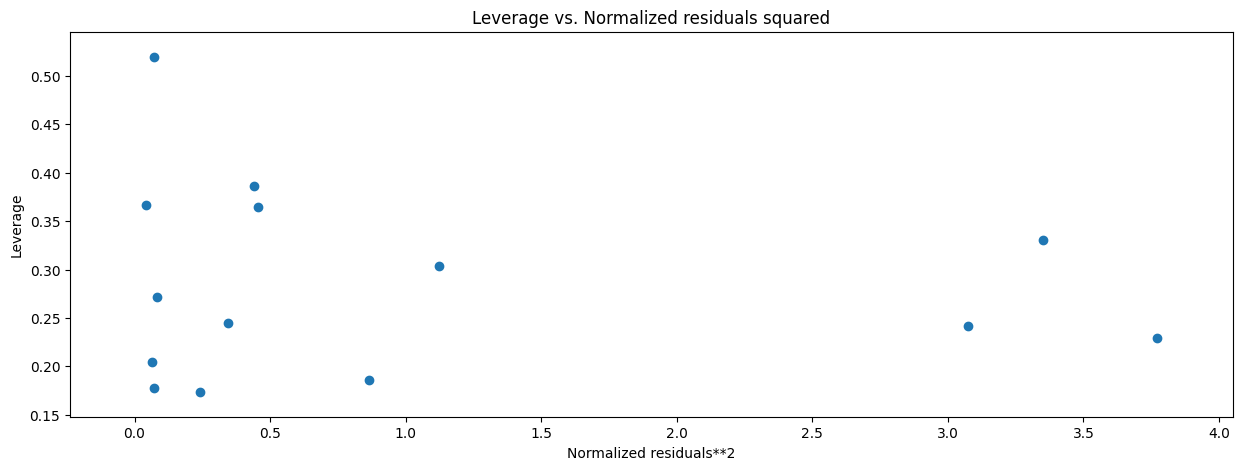

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
fig = plot_leverage_resid2(m, ax=ax)

# 5. Influence plot

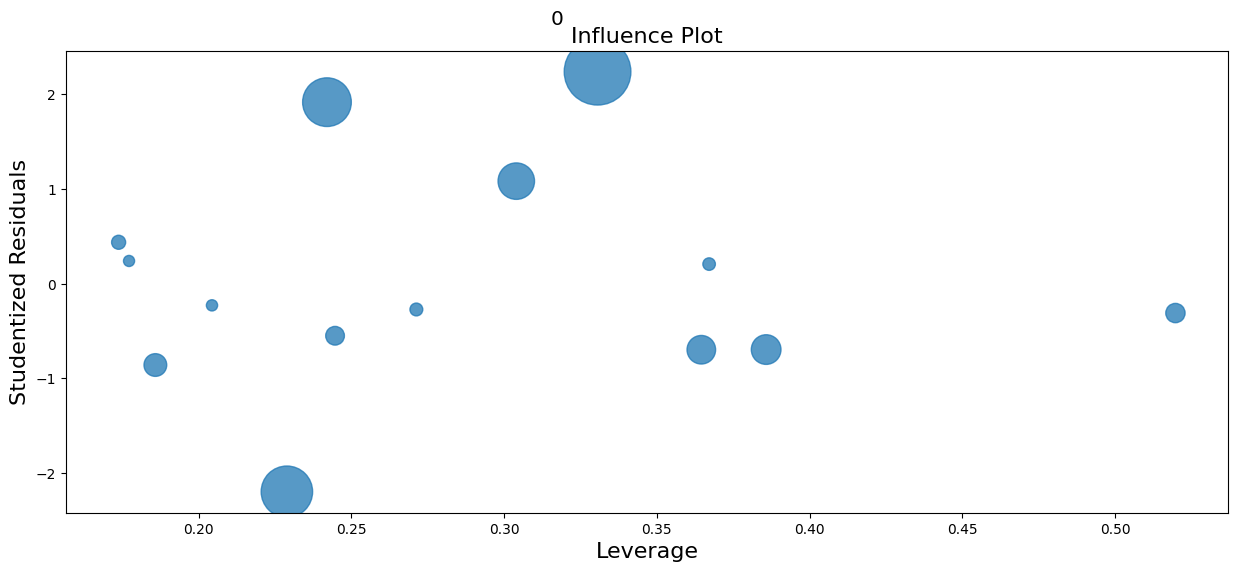

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
fig = influence_plot(m, ax=ax)

# 6. Summary

In [9]:
# Print the summary of the regression model
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Clean   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     20.20
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           0.000145
Time:                        02:03:35   Log-Likelihood:                -46.018
No. Observations:                  14   AIC:                             100.0
Df Residuals:                      10   BIC:                             102.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8816     28.329      1.161      0.2

/Users/derekwong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
# Get the parameters
m.params

Intercept    32.881650
Snatch        0.827913
Body          0.105724
Age           1.025736
dtype: float64

We can conclude that the performance in snatch is the most indicative of the three variables, followed by weightlifter's age and body weight.